### Labeling photos with unsupervised learning

In [1]:
# Import libraries for labeling the photos with unsupervised learning
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import load_img, img_to_array
from keras.preprocessing import image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def image_paths_name(folder_name):
    image_paths = []
    for image_name in os.listdir(folder_name):
        image_paths.append(os.path.join(folder_name, image_name))
    return image_paths

In [3]:
image_paths = image_paths_name('train')

# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to preprocess and extract features
def extract_features(img_path, model):
    img = load_img(img_path, target_size=(224, 224))
    img_data = img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

# Extract features from all images
features = [extract_features(img_path, model) for img_path in image_paths]


1/1 [==============================] - 0s 196ms/step


In [7]:
pca = PCA(n_components=50)  # Adjust the number of components as needed
reduced_features = pca.fit_transform(features)

In [8]:
kmeans = KMeans(n_clusters=5)  # Choose the number of clusters
clusters = kmeans.fit_predict(reduced_features)

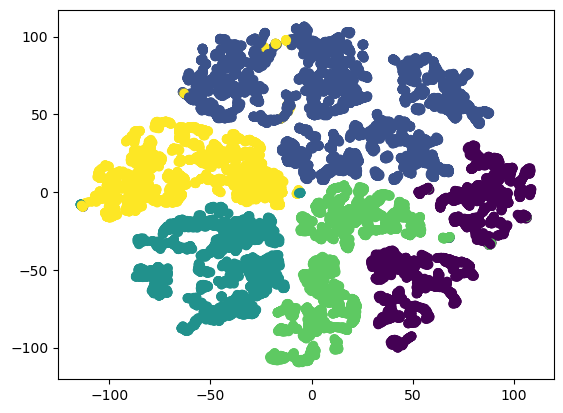

In [9]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(reduced_features)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters)
plt.show()